In [ ]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [ ]:
no_of_samples = 1000
class_zero_ratio = 0.9
no_of_class_zero = int(no_of_samples*class_zero_ratio)
no_of_class_one = 100

In [ ]:
no_of_class_zero,no_of_class_one

(900, 100)

# **Adding Some features to the classes**

In [ ]:
class_zero = {'feature 1':np.random.normal(0,1,no_of_class_zero),
              'feature 2':np.random.normal(0,1,no_of_class_zero),
              'target':[0]*no_of_class_zero}

# Here I made 2 features where values will be between 0 and 1. And how many times?
# Total of 'no_of_class_zero' times there will be values.

In [ ]:
print(class_zero)

{'feature 1': array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.1

In [ ]:
class_zero = pd.DataFrame(class_zero)

In [ ]:
class_zero

,feature 1,feature 2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [ ]:
class_one = pd.DataFrame({'feature 1':np.random.normal(3,1,no_of_class_one),
                          'feature 2':np.random.normal(3,1,no_of_class_one),
                          'target':[1]*no_of_class_one})

In [ ]:
class_one

,feature 1,feature 2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [ ]:
df = pd.concat([class_zero,class_one]).reset_index(drop=True)

In [ ]:
print(df)

     feature 1  feature 2  target
0     1.624345  -0.446699       0
1    -0.611756   0.204377       0
2    -0.528172   0.612233       0
3    -1.072969   0.744885       0
4     0.865408  -0.036281       0
..         ...        ...     ...
995   3.213026   3.188583       1
996   2.195458   3.560918       1
997   2.353418   2.078341       1
998   4.138173   3.647375       1
999   3.295440   4.386826       1

[1000 rows x 3 columns]


# **Counting the frequencies of every distinct values from the target**

In [ ]:
df.target.value_counts()

,count
target,
0,900
1,100


# **UP SAMPLING**

In up sampling you repeat datapoints to balance with other datapoints.

## How?

Ans:
  - With Replacement
  - Without Replacement

<br>

If replace = True ; it means data can be repeated!

In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
df_minority

,feature 1,feature 2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [ ]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True,
                                 n_samples = len(df_majority),random_state=1)

# Here 'replace = True' means data can be repeated.
# How Many times? Ans: Upto the length of majority elements! That's why used 'n_samples'.

In [ ]:
df_minority_upsampled

,feature 1,feature 2,target
937,2.253776,1.681477,1
912,2.448320,2.898619,1
972,2.541698,2.700847,1
909,1.724886,1.748043,1
975,2.427974,4.613562,1
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [ ]:
df_upsample = pd.concat([df_majority,df_minority_upsampled])

In [ ]:
df_upsample

,feature 1,feature 2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [ ]:
df_minority_upsampled.target

In [ ]:
df_minority_upsampled.target.value_counts()

,count
target,
1,900


# **DOWN SAMPLING**

You want majority of the datapoints like the minority of the datapoints.

In [ ]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority,replace = False,
                                   n_samples = len(df_minority),random_state=1)

In [ ]:
df_majority_downsampled

,feature 1,feature 2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [ ]:
df_upsample = pd.concat([df_majority,df_majority_downsampled])

In [ ]:
df_upsample

,feature 1,feature 2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


# **Another way of resampling**

For Downsampling you can use this process!

In [ ]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,
                          n_clusters_per_class=1,weights=[0.90])

# 'n_redundant' means I don't want my datas to be repeated!

In [ ]:
X

array([[-1.51821333,  1.35955121],
       [-2.83019665,  2.19889382],
       [-0.43957562,  0.64372618],
       ...,
       [-0.36862429,  0.58175248],
       [ 0.20596046,  0.18361219],
       [-0.82413762,  0.87644587]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
df1 = pd.DataFrame(X,columns=['feature 1','feature 2'])
df2 = pd.DataFrame(y,columns=['target'])

In [ ]:
final_df = pd.concat([df1,df2],axis=1)

In [ ]:
final_df

,feature 1,feature 2,target
0,-1.518213,1.359551,0
1,-2.830197,2.198894,0
2,-0.439576,0.643726,0
3,-1.898158,1.603483,0
4,0.311843,0.126998,0
...,...,...,...
995,-1.379980,1.266650,0
996,0.124204,0.220194,0
997,-0.368624,0.581752,0
998,0.205960,0.183612,0


<Axes: xlabel='feature 1', ylabel='feature 2'>

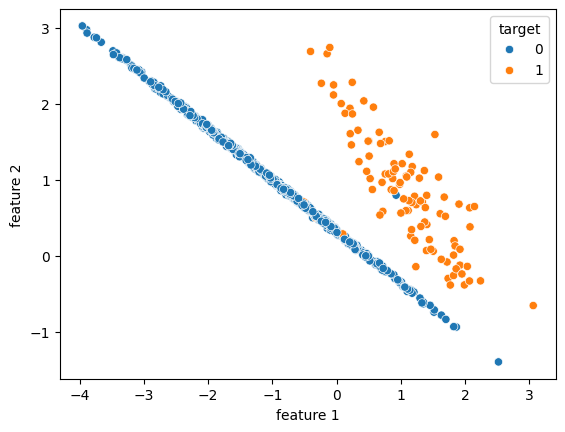

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=final_df,x='feature 1',y='feature 2',hue='target')

# Here, Class-0 and Class-1 is 2 classes that are present in the plot.
# meaning there are 2 clusters!

# **SMOTE**
(Synthatic Minority OverSampling Technique)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

In [ ]:
x,y = oversample.fit_resample(final_df[['feature 1','feature 2']],final_df['target'])

In [ ]:
x

,feature 1,feature 2
0,-1.518213,1.359551
1,-2.830197,2.198894
2,-0.439576,0.643726
3,-1.898158,1.603483
4,0.311843,0.126998
...,...,...
1787,1.869079,-0.177915
1788,1.413694,0.112656
1789,0.006217,2.594001
1790,0.505898,1.048226


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1787,1
1788,1
1789,1
1790,1


In [ ]:
x.shape

(1792, 2)

In [ ]:
df1 = pd.DataFrame(x,columns=['feature 1','feature 2'])
df2 = pd.DataFrame(y,columns=['target'])

smote_df = pd.concat([df1,df2],axis=1)
smote_df

,feature 1,feature 2,target
0,-1.518213,1.359551,0
1,-2.830197,2.198894,0
2,-0.439576,0.643726,0
3,-1.898158,1.603483,0
4,0.311843,0.126998,0
...,...,...,...
1787,1.869079,-0.177915,1
1788,1.413694,0.112656,1
1789,0.006217,2.594001,1
1790,0.505898,1.048226,1


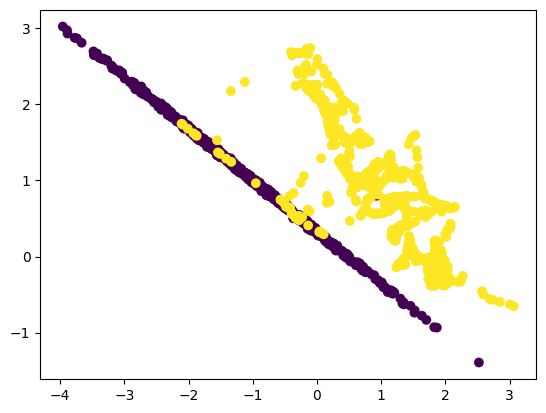

In [ ]:
plt.scatter(x=smote_df['feature 1'],y=smote_df['feature 2'],c=smote_df['target'])

# **Data INTERPOLATION**

Generating new data points between 2 known data points!

It's actually for SMOTE sampling so that there will be clusters of same datapoints among different classes.

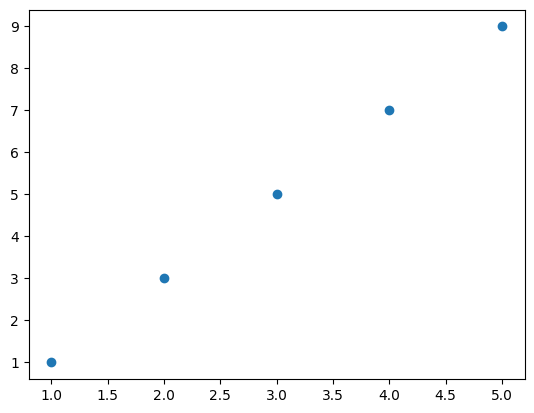

In [61]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,5,7,9])
plt.scatter(x,y)

Now we need to generate new data points between multiple datapoints!

## **LINEAR INTERPOLATION**

### **np.linspace() means:**

np.linspace(start, end, num)
Meaning:

start → first value

end → last value

num → how many values to generate (including start & end)

In [62]:
 # New data points :
x_new = np.linspace(1,5,10)

# As x had first value as 1 and last value as 5.

In [63]:
y_interpolated = np.interp(x_new,x,y)

# I just created new synthatic datapoints

In [64]:
y_interpolated

array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
       5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ])

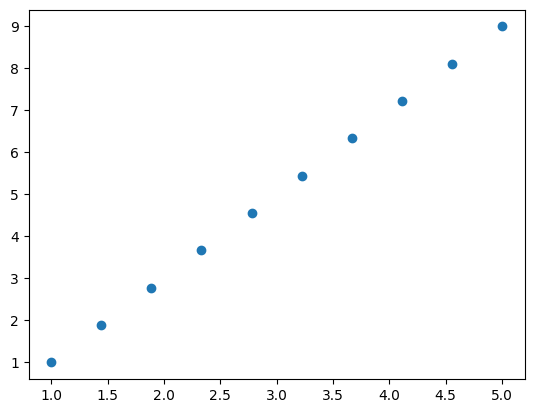

In [65]:
plt.scatter(x_new,y_interpolated)

## **CUBIC INTERPOLATION**:

In [66]:
# data points:

x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

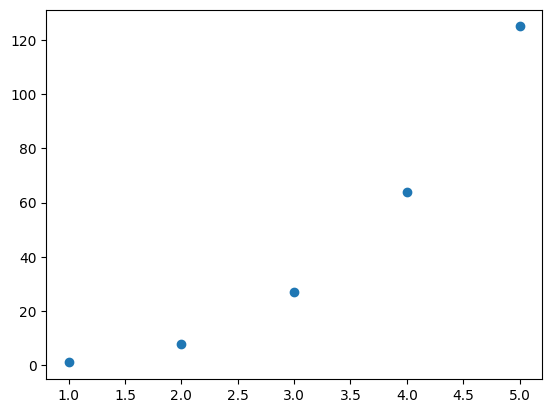

In [67]:
plt.scatter(x,y)

In [72]:
from scipy.interpolate import interp1d

f = interp1d(x,y,kind="cubic")

In [73]:
x_new = np.linspace(1,5,10)
y_interpolated = f(x_new)

# I just created new synthatic datapoints

In [74]:
y_interpolated

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

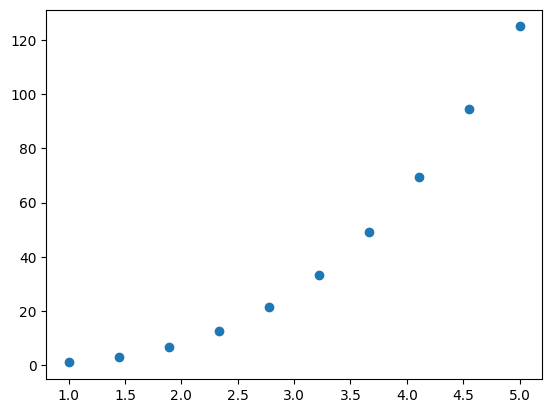

In [75]:
plt.scatter(x_new,y_interpolated)

## **POLYNOMIAL INTERPOLATION:**

In [76]:
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,1,25])


In [77]:
p = np.polyfit(x,y,2)  # Here: '2' is the degree number

In [80]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)


# I just created new synthatic datapoints

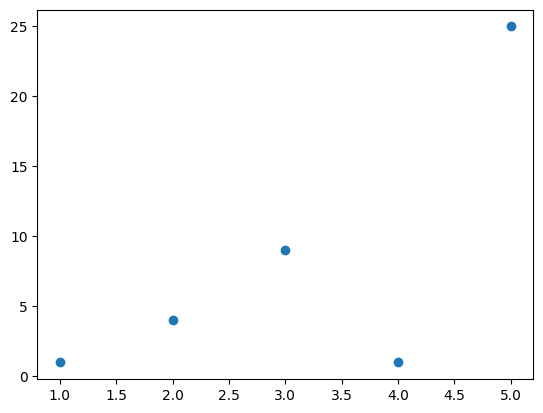

In [82]:
plt.scatter(x,y)

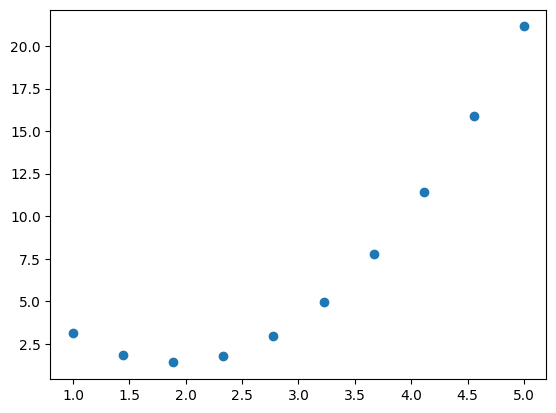

In [81]:
plt.scatter(x_new,y_interp)